In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей (датасет '20 Newsgroups' доступный в `sklearn.datasets`).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.


In [12]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
    "comp.os.ms-windows.misc",
]
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
    "comp.os.ms-windows.misc",
]
data_train = fetch_20newsgroups(subset='train', categories=categories)
y_train = data_train.target
data_test = fetch_20newsgroups(subset='test', categories=categories)
y_test = data_test.target
len(list(data_train.target_names))


20

In [13]:
len(data_train.data)

11314

In [14]:
data_train.data[1:5]

["From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n",
 'From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Engine

2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.fit_transform(data_test.data)

In [16]:
X_train.shape

(11314, 56121)

#### после векторизации получаем данные для тренировки размерностью 56121

In [17]:
X_test.shape

(7532, 41432)

#### после векторизации получаем данные для ТЕСТа размерностью 41432

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP (Uniform Manifold Approximation and Projection)


In [42]:
# n_components = len(list(data_train.target_names))
n_components = 2000

In [43]:
#   - PCA (Principal Component Analysis)
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_train_pca.shape

In [39]:
# Суммирование долей дисперсии для определения сохранённых данных
variance_retained = np.sum(pca.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до {n_components} компонент.")

Сохранено 20.60% данных после понижения размерности до 200 компонент.


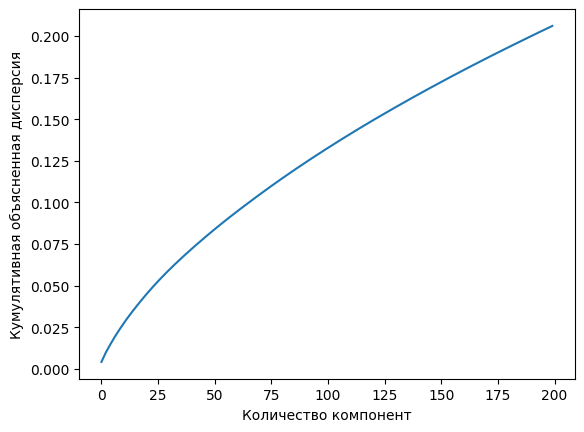

In [40]:
# Кумулятивная сумма объясненной дисперсии:  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.show()

In [41]:
#   - TsnE (Principal Component Analysis)
pca2 = PCA(n_components=2)
X_train_pca_2 = pca2.fit_transform(X_train)
tsne = TSNE(n_components=2, random_state=42, init="random", method="exact")
X_train_tsne = tsne.fit_transform(X_train)
# X_test_tsne = tsne.fit_transform(X_test)
print(X_train_tsne.shape)
# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization by Age Groups')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

KeyboardInterrupt: 

#### после уменьшения компонент до 2, уменьшилась и размерность

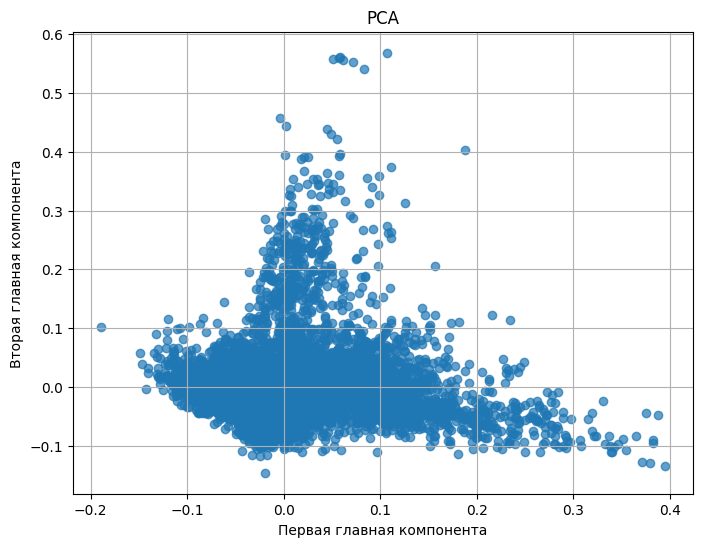

(20, 41432)


In [27]:
# визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.7)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA')
plt.grid(True)
plt.show()

# вывод влияния признаков на компоненты
components = pca.components_
print(components.shape)

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.


In [28]:
# попробуем модель Логистической регрессии после векторизации без понижения размерности (train)
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
lr_clf = LogisticRegression()
lr_clf.fit(X_train_train, y_train_train)

lr_pred = lr_clf.predict(X_train_train)
train_score = accuracy_score(y_train_train, lr_pred) * 100
print(f"Train accuracy score ({X_train.shape[1]} components): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_train)
test_score = classification_report(y_test_train, lr_pred) * 100
print(f"Test score ({X_train.shape[1]} components): {test_score}%")


Train accuracy score (56121 components): 98.00%
Test score (56121 components):               precision    recall  f1-score   support

           0       0.95      0.93      0.94        97
           1       0.74      0.88      0.80       104
           2       0.85      0.83      0.84       115
           3       0.75      0.78      0.76       123
           4       0.94      0.84      0.89       126
           5       0.84      0.92      0.88       106
           6       0.77      0.87      0.82       109
           7       0.93      0.91      0.92       139
           8       0.94      0.96      0.95       122
           9       0.97      0.98      0.98       102
          10       0.99      0.95      0.97       108
          11       1.00      0.95      0.98       125
          12       0.84      0.86      0.85       114
          13       0.98      0.95      0.97       119
          14       0.99      0.98      0.98       127
          15       0.89      0.90      0.90       122
  

#### качество модели Логистической регрессии без уменьшения размерности выдает показатель 90% 

In [29]:
# теперь проверим на уменьшенных данных
lr_clf = LogisticRegression()
lr_clf.fit(X_train_pca, y_train)

lr_pred = lr_clf.predict(X_train_pca)
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score ({n_components} components ): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_pca)
test_score = accuracy_score(y_test, lr_pred) * 100
print(f"Test accuracy score ({n_components} components): {test_score:.2f}%")


Train accuracy score (20 components ): 61.82%
Test accuracy score (20 components): 3.70%


#### качество модели после уменьшения до 10 компонент методом PCA ухудшилось до 51%

5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.


6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.


7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.